<a href="https://colab.research.google.com/github/austinkirwin/public-projects/blob/main/Python_projects/LinRegModelFromScratch/Building_a_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Linear Regression Model

In this notebook, I will be building and optimizing a Linear Regression Model in the hopes that it can accurately predict Mileage from various other variables--although the actual data is irrelevant, the point of this notebook is purely to showcase and improve my skills with building a model.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Importing the data set

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/austinkirwin/public-projects/refs/heads/main/Python_projects/LinRegModelFromScratch/uae_used_cars_10k.csv")
data.head()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...


## Basic data manipulation

In [ ]:
# Description is useless for mileage so I will remove it

data = data.drop("Description", axis=1)
data.head()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai


In [ ]:
# Many categorical variables so One-Hot Encoding

transformed_data = pd.get_dummies(data, dtype = int)
transformed_data.head() # 616 columns is excessive, let's try dropping some

transformed_data = pd.get_dummies(data.drop('Location', axis=1), dtype = int)
transformed_data.head() # 600 columns

transformed_data = pd.get_dummies(data.drop(['Location','Color'], axis = 1), dtype = int)
transformed_data.head() # 583 columns

transformed_data = pd.get_dummies(data.drop(['Location','Color','Make','Model'], axis = 1), dtype = int)
transformed_data.head() # Only 30 columns!!

,Year,Price,Mileage,Body Type_Coupe,Body Type_Crossover,Body Type_Hard Top Convertible,Body Type_Hatchback,Body Type_Other,Body Type_Pick Up Truck,Body Type_SUV,...,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_Unknown,Transmission_Automatic Transmission,Transmission_Manual Transmission,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Gasoline,Fuel Type_Hybrid
0,2016,47819,156500,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2013,61250,169543,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,2023,31861,221583,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2016,110322,69754,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2020,139994,71399,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


Looking at pairwise data to see if there are any patterns

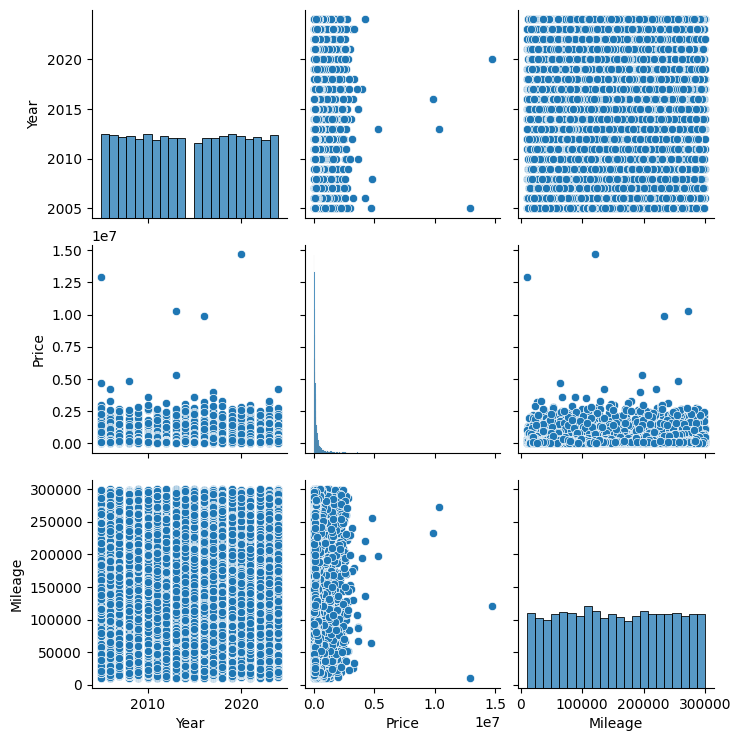

In [ ]:
sns.pairplot(data)

There do not seem to be any obvious relationships.

## Building the Model

In [ ]:
train, test = train_test_split(transformed_data, test_size=.2)

model = smf.ols(formula = 'Mileage ~ Price', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mileage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.255
Date:                Tue, 04 Mar 2025   Prob (F-statistic):              0.263
Time:                        21:47:19   Log-Likelihood:            -1.0206e+05
No. Observations:                8000   AIC:                         2.041e+05
Df Residuals:                    7998   BIC:                         2.041e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.543e+05   1058.043    145.833      0.000    1.52e+05    1.56e+05
Price          0.0022      0.002      1.120      0.263      -0.002       0.006
==============================================================================
Omnibus:                     7689.209   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.066
Skew:                           0.007   Prob(JB):                    6.32e-107
Kurtosis:                       1.789   Cond. No.                     6.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking for highly influential or high leverage points

In [ ]:
# Get influence measures
influence = model.get_influence()

# Print Cook's distances
print("Cook's Distances:")
print(max(influence.cooks_distance[0]))

# Print leverage values
print("\nLeverage Values:")
print(max(influence.hat_matrix_diag))

Cook's Distances:
0.2240768497189483

Leverage Values:
0.11459555751536069


In [ ]:
train_exp = train.drop('Mileage', axis = 1)
train_target = train['Mileage']
test_exp = test.drop('Mileage', axis = 1)
test_target = test['Mileage']

linreg = LinearRegression()
linreg.fit(train_exp, train_target)
linreg.score(test_exp, test_target) # obviously overfitted model

-0.009194744480062411

In [ ]:
new_data = pd.get_dummies(data.drop(['Location','Color','Make','Model', 'Body Type'], axis = 1), dtype = int)
new_data.head()

,Year,Price,Mileage,Cylinders_10,Cylinders_12,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_Unknown,Transmission_Automatic Transmission,Transmission_Manual Transmission,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Gasoline,Fuel Type_Hybrid
0,2016,47819,156500,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,2013,61250,169543,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,2023,31861,221583,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,2016,110322,69754,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,2020,139994,71399,0,0,0,1,0,0,0,0,0,1,0,0,1,0


## Testing other models

In [ ]:
new_train, new_test = train_test_split(new_data, test_size=.2)
new_train_exp = new_train.drop('Mileage', axis = 1)
new_train_target = new_train['Mileage']
new_test_exp = new_test.drop('Mileage', axis = 1)
new_test_target = new_test['Mileage']

new_linreg = LinearRegression()
new_linreg.fit(new_train_exp, new_train_target)
new_linreg.score(new_test_exp, new_test_target) # still overfit

-0.003463323851841782

In [ ]:
AAAAA_data = data.drop(['Make','Model','Body Type','Cylinders','Transmission','Fuel Type','Color','Location'], axis = 1)
A_train, A_test = train_test_split(AAAAA_data, test_size=.2)
A_trainexp = A_train.drop('Mileage', axis = 1)
A_traintar = A_train['Mileage']
A_testexp = A_test.drop('Mileage', axis = 1)
A_testtar = A_test['Mileage']

Alinreg = LinearRegression()
Alinreg.fit(A_trainexp, A_traintar)
Alinreg.score(A_testexp, A_testtar)

-0.0019276961904044487

In conclusion all of these models have extremely low R^2 scores so Mileage is probably not able to be predicted by any of the variables in the dataset.